# Water analogy of quantum decoherence

In [1]:
from mub_qhamiltonian import MUBQHamiltonian # class for Mutually Unbiased Basis
from scipy.linalg import expm, eigh, svd, norm
import matplotlib.pyplot as plt # plotting facility
import numpy as np

In [2]:
x_amplitude = 40.
x_grid_dim = 8*128
F = 5 

In [3]:
def prpagate(dt, ntimes):
    
    # Create the Hamiltonians 
    qsys = MUBQHamiltonian(
        x_grid_dim=x_grid_dim,
        x_amplitude=x_amplitude,
        v=lambda x: -np.sqrt(F / dt) * x,
        k=lambda p: 0.5 * p ** 2,
    )
    
    H_plus = qsys.hamiltonian
    x = qsys.x
    dx = qsys.dx
    
    H_minus = MUBQHamiltonian(
        x_grid_dim=x_grid_dim,
        x_amplitude=x_amplitude,
        v=lambda x: +np.sqrt(F / dt) * x,
        k=lambda p: 0.5 * p ** 2,
    ).hamiltonian

    # the propagators
    U_plus = expm(-dt * 1j * H_plus)
    U_minus = expm(-dt * 1j * H_minus)

    # Initial state
    psi0 = np.exp(-(x-1) ** 2 / 0.4) + np.exp(-(x+1) ** 2 / 0.4) 
    psi0 /= norm(psi0) * np.sqrt(dx)

    # do ensemble propagation by methond from https://link.aps.org/doi/10.1103/PhysRevResearch.3.013017
    wavefunction_ensemble = psi0.reshape(1, -1)
    
    for _ in range(ntimes):
    
        expanded_wavefunction_ensemble = np.zeros(
            (2 * wavefunction_ensemble.shape[0], wavefunction_ensemble.shape[1]),
            dtype=complex
        )
        
        for indx, psi in enumerate(wavefunction_ensemble):
            expanded_wavefunction_ensemble[2 * indx, :] = U_plus @ psi
            expanded_wavefunction_ensemble[2 * indx + 1, :] = U_minus @ psi
        
        wavefunction_ensemble = expanded_wavefunction_ensemble
        wavefunction_ensemble /= norm(wavefunction_ensemble, axis=1).reshape(-1, 1) * np.sqrt(dx)
    
    rho = wavefunction_ensemble.conj().T @  wavefunction_ensemble

    return rho

## Varying number of steps

## Varying $dt$: The left column is one-step propagation. The right column is the two step propagation by $dt/2$

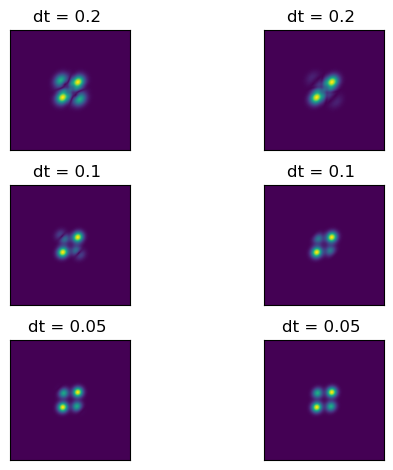

In [5]:

for nfig, dt in enumerate([0.2, 0.1, 0.05,]): 

    plt.subplot(320 + 2 * nfig + 1)
    plt.title(f"dt = {dt} ")
    plt.imshow(np.abs(prpagate(dt, 1)))
    plt.xlim(visualize_range)
    plt.ylim(visualize_range)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(320 + 2 * nfig + 2)
    plt.title(f"dt = {dt} ")
    plt.imshow(np.abs(prpagate(dt / 2, 2)))
    plt.xlim(visualize_range)
    plt.ylim(visualize_range)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()